# EDA: Covid-19 statistics in United States from 22-01-2020 till 22-01-2020 

In [1]:
import numpy as np
import pandas as pd

covid19_df = pd.read_csv('./Dataset/archive/usa_county_wise.csv')
covid19_df['County'] = covid19_df['Combined_Key'].apply(lambda x: x.split(',')[0])
covid19_df['Date'] = pd.to_datetime(covid19_df['Date'], format='%m/%d/%y')
covid19_df.drop(columns=['Combined_Key', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region'], axis=1, inplace=True)
covid19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   UID             627920 non-null  int64         
 1   Province_State  627920 non-null  object        
 2   Lat             627920 non-null  float64       
 3   Long_           627920 non-null  float64       
 4   Date            627920 non-null  datetime64[ns]
 5   Confirmed       627920 non-null  int64         
 6   Deaths          627920 non-null  int64         
 7   County          627920 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 38.3+ MB


In [6]:
covid19_df.head(10)

,UID,Province_State,Lat,Long_,Date,Confirmed,Deaths,County
0,16,American Samoa,-14.271000,-170.132000,2020-01-22,0,0,American Samoa
1,316,Guam,13.444300,144.793700,2020-01-22,0,0,Guam
2,580,Northern Mariana Islands,15.097900,145.673900,2020-01-22,0,0,Northern Mariana Islands
3,63072001,Puerto Rico,18.180117,-66.754367,2020-01-22,0,0,Adjuntas
4,63072003,Puerto Rico,18.360255,-67.175131,2020-01-22,0,0,Aguada
5,63072005,Puerto Rico,18.459681,-67.120815,2020-01-22,0,0,Aguadilla
6,63072007,Puerto Rico,18.251619,-66.126806,2020-01-22,0,0,Aguas Buenas
7,63072009,Puerto Rico,18.131361,-66.264131,2020-01-22,0,0,Aibonito
8,63072011,Puerto Rico,18.287985,-67.120611,2020-01-22,0,0,Anasco
9,63072013,Puerto Rico,18.406631,-66.675077,2020-01-22,0,0,Arecibo


## Confirmed & Death  Cases (Sorted by the number of Death cases)

In [6]:
covid19_states_cd = covid19_df.groupby('Province_State', as_index=False)[['Confirmed', 'Deaths']].sum().sort_values(by='Deaths', ascending=False)
covid19_states_cd.style.background_gradient(cmap='YlOrRd')

,Province_State,Confirmed,Deaths
36,New York,39808447,3176945
34,New Jersey,16506714,1221339
25,Massachusetts,9874030,666157
26,Michigan,6690544,576093
17,Illinois,11900637,541672
43,Pennsylvania,8096993,537261
5,California,17618695,481757
7,Connecticut,4239220,374346
11,Florida,12657802,292541
22,Louisiana,5383429,285084


## Death Rate & Recovery Rate
Death_Rate: number of deaths divided by number of confirmed cases

In [51]:
covid19_states_cd['Death_Rate'] = 100*covid19_states_cd['Deaths']/covid19_states_cd['Confirmed']
covid19_states_deathrate = covid19_states_cd.sort_values(by='Death_Rate', ascending=False)
covid19_states_deathrate.head(5)

,Province_State,Confirmed,Deaths,Death_Rate
47,South Dakota,539323,77572,14.383217
7,Connecticut,4239220,374346,8.830540
26,Michigan,6690544,576093,8.610555
39,Northern Mariana Islands,2741,230,8.391098
36,New York,39808447,3176945,7.980580


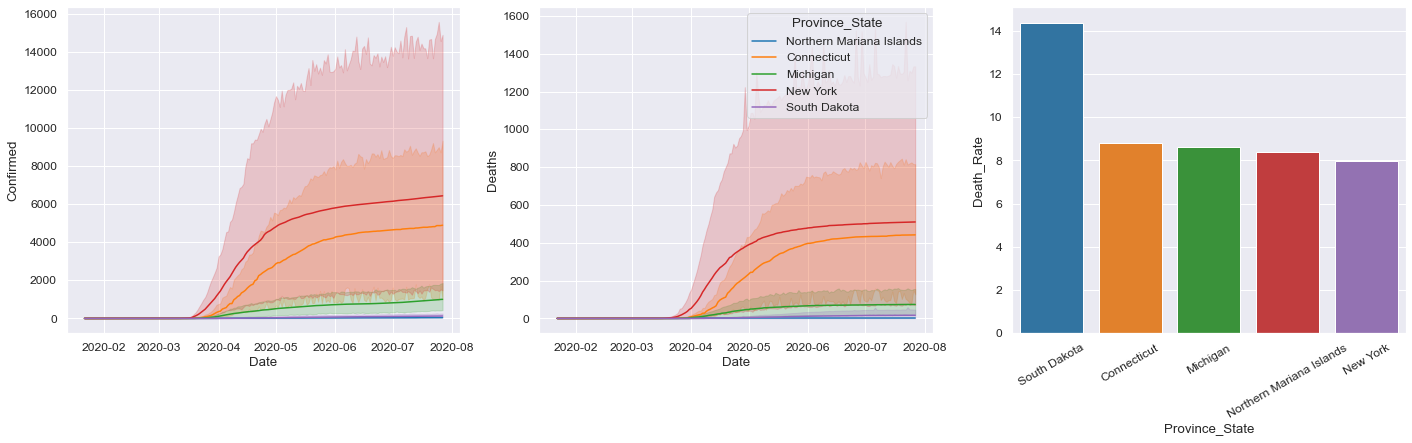

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.1)
ax = plt.figure(figsize=(24,6)).subplots(1,3)
most_affected = covid19_states_deathrate.head(5)['Province_State']

sns.lineplot(data=covid19_df[covid19_df['Province_State'].isin(most_affected)], x='Date', y='Confirmed', hue='Province_State', ax=ax[0], legend=False)
sns.lineplot(data=covid19_df[covid19_df['Province_State'].isin(most_affected)], x='Date', y='Deaths', hue='Province_State', ax=ax[1])
sns.barplot(data=covid19_states_deathrate[covid19_states_deathrate['Province_State'].isin(most_affected)], x='Province_State', y='Death_Rate', ax=ax[2])

ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30)
    
plt.show()

In [58]:
import geopandas
states = geopandas.read_file('USA_States/USA_States.shp')
states['DEATHS'] = states['STATE_NAME'].map(lambda x: list(covid19_states_cd[covid19_states_cd['Province_State']==x]['Deaths'])[0])
states['CONFIRMED'] = states['STATE_NAME'].map(lambda x: covid19_states_cd[covid19_states_cd['Province_State']==x]['Confirmed'].to_list()[0])
states['DEATH_RATE'] = states['STATE_NAME'].map(lambda x: covid19_states_deathrate[covid19_states_deathrate['Province_State']==x]['Death_Rate'].to_list()[0])

In [59]:
states.sample(10)

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,DEATHS,CONFIRMED,DEATH_RATE
22,Utah,49,UT,"POLYGON ((-114.04727 38.13765, -114.04509 38.5...",14229,1596769,0.891112
37,North Carolina,37,NC,"MULTIPOLYGON (((-83.98845 34.98915, -84.11815 ...",103531,4573238,2.263845
43,Georgia,13,GA,"MULTIPOLYGON (((-85.13016 31.77885, -85.13156 ...",222262,6859759,3.240085
41,Alabama,01,AL,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",73446,2880805,2.549496
47,Florida,12,FL,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ...",292541,12657802,2.311152
14,Nebraska,31,NE,"POLYGON ((-101.40739 40.00100, -102.05154 39.9...",18039,1445593,1.247862
21,Nevada,32,NV,"POLYGON ((-119.15245 38.41180, -119.31883 38.5...",45082,1508128,2.989269
46,Louisiana,22,LA,"MULTIPOLYGON (((-93.70752 30.23958, -93.69938 ...",285084,5383429,5.295584
5,Wyoming,56,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",212,120404,0.176074
48,Michigan,26,MI,"MULTIPOLYGON (((-88.49753 48.17380, -88.62533 ...",576093,6690544,8.610555


c:\Dev\Python\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Text(0.5, 1.0, 'Death Cases')

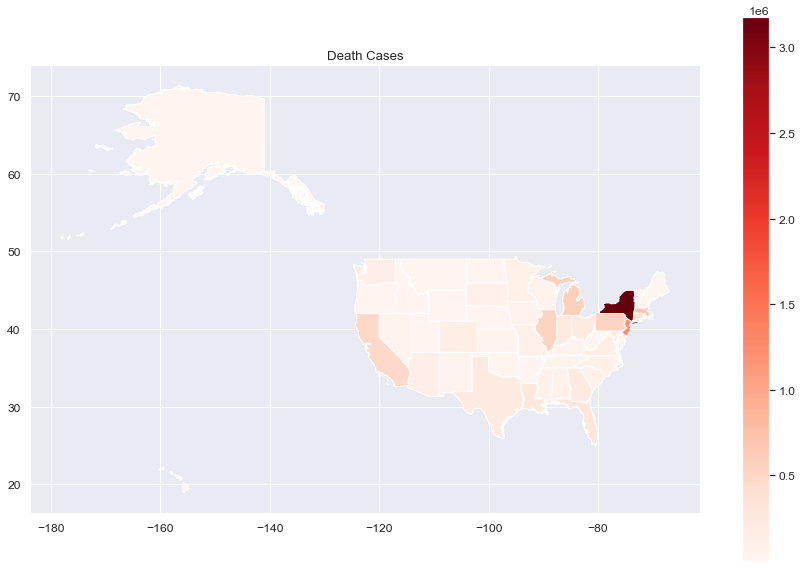

In [71]:
states.plot(column='DEATHS',cmap='Reds', legend=True, figsize=(15,10))
plt.title('Death Cases')

c:\Dev\Python\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Text(0.5, 1.0, 'Confirmed Cases')

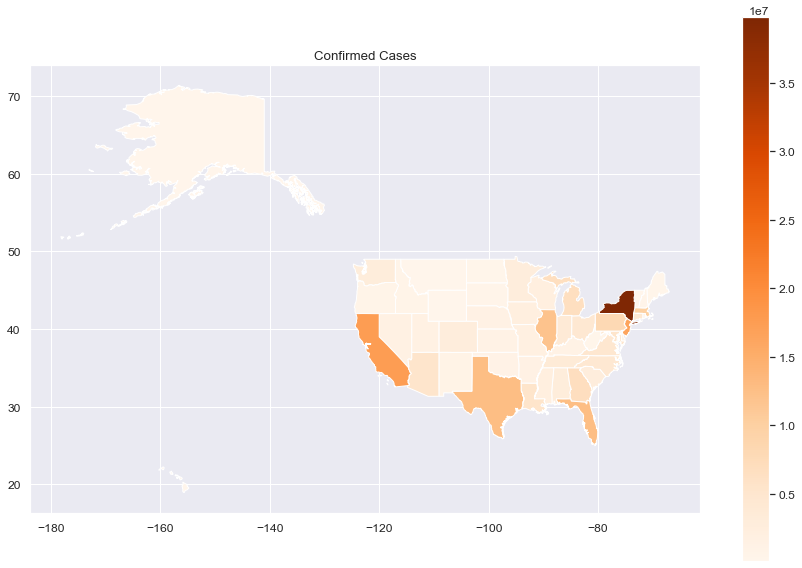

In [70]:
states.plot(column='CONFIRMED', cmap='Oranges', legend=True, figsize=(15,10))
plt.title('Confirmed Cases')

c:\Dev\Python\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Text(0.5, 1.0, 'Death Rate')

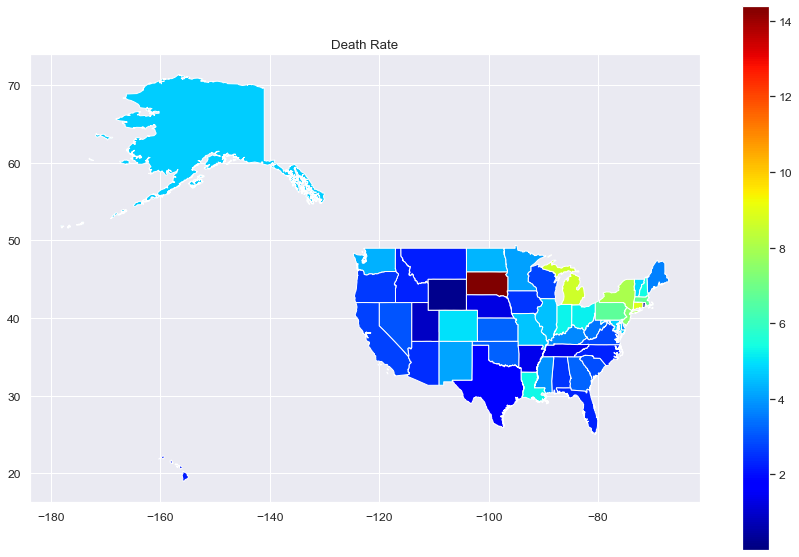

In [69]:
states.plot(column='DEATH_RATE', cmap='jet', legend=True, figsize=(15,10))
plt.title('Death Rate')